In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Load and Inspect

In [48]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [49]:
df.shape

(891, 15)

In [50]:
# feature selection
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embarked']]
df.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


# Handling Null Values

In [52]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
fare          0
embarked      2
dtype: int64

In [53]:
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Encoding features

In [54]:
le = LabelEncoder()

In [55]:
for feature in df.columns:
    if df[feature].dtype == 'object':
        print(f'Feature: {feature}')
        print(f'Before Encoding:\n{df[feature].unique()}')
        df[feature] = le.fit_transform(df[feature])
        print(f'After Encoding:\n{df[feature].unique()}\n')

Feature: sex
Before Encoding:
['male' 'female']
After Encoding:
[1 0]

Feature: embarked
Before Encoding:
['S' 'C' 'Q']
After Encoding:
[2 0 1]



# Feature Selection

In [57]:
X = df.drop('survived', axis=1)
y = df.survived

# Train Test Split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Building

In [78]:
classifier = DecisionTreeClassifier(
    criterion='gini', # gini impurity
    max_depth=5
)
classifier.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Training Score / Model Score

In [79]:
classifier.score(X_train, y_train)

0.85553772070626

# Test Score

In [80]:
y_pred = classifier.predict(X_test)

In [81]:
# accuracy
accuracy_score(y_test, y_pred)

0.7947761194029851

In [82]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       157
           1       0.77      0.72      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.79      0.79      0.79       268



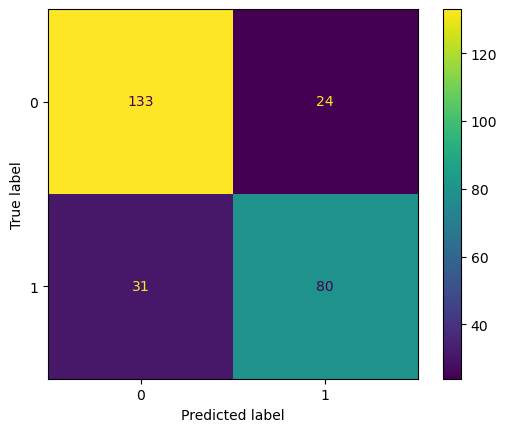

In [83]:
# confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Tree Plot

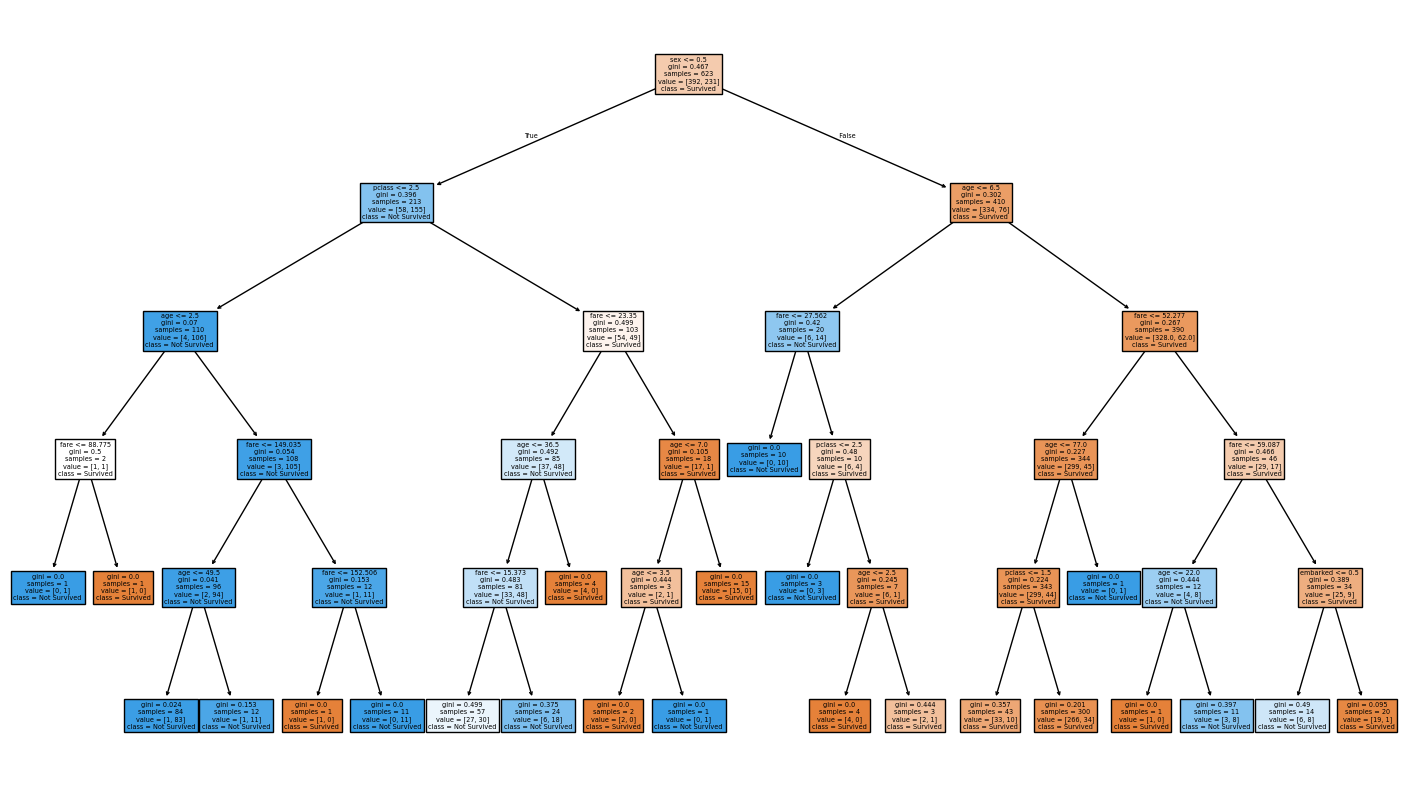

In [84]:
plt.figure(figsize=(18, 10))
plot_tree(
    classifier,
    feature_names=X.columns,
    class_names=['Survived', 'Not Survived'],
    filled=True
)
plt.show()

# Testing

In [87]:
new_passenger = pd.DataFrame([[3, 0, 25, 7, 2]], columns=X.columns)

prediction = classifier.predict(new_passenger)
if prediction == 0:
    print('Not Survived 💀🩻☠️')
else:
    print('Survived 🍀')

Survived 🍀
